# Homework Assignment 3  
# Regression models

# <p style="text-align: right;"> &#9989; David Perez</p>
# <p style="text-align: right;"> &#9989; TumsAddict</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression
* Creating a project timeline

**This assignment is due by 11:59 pm on Friday, April 4th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 80 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
# Part 1: Git Branch (6 points)

For this assignment, you're going to add it to the `cmse202-s25-turnin` repository you created so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone -b hw03_branch https://github.com/TumsAddict/cmse202-s25-turnin/tree/main/hw-03

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.


In [1]:
### Points breakdown -- 1 pt for command to clone repo
###                     2 pts for setting up branch, etc.
###                     3 pts for Git commits/Pushes throughout homework.

---
# Part 2: Loading the datasets (10 points)

In Parts 2, you will be working with the California Cooperative Oceanic Fisheries Investigations oceanographic and larval fish dataset that is available at https://www.kaggle.com/datasets/sohier/calcofi?resource=download. 

To get started on Part 2, **you'll need to download the following file**:

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Book1.csv`

&#9989; **Question 2.1 (2 points)**: **Do this:** Save the above CSV file in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the files.** If you did not use a command line tool to download the files, write down the command(s) that *would* have downloaded the files.

``` bash
# Put the (two) commands you used to download the two files here.
!curl -o Book1.csv https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Book1.csv
!curl -L -o ~/Downloads/calcofi.zip\https://www.kaggle.com/api/v1/datasets/download/sohier/calcofi
```

&#9989;  **Question 2.2 (2 points)**: Next, load the data using Pandas and display the first 20 rows

In [2]:
# Put your code here
import pandas as pd
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    # List the contents of the zip file
    zip_files = zip_ref.namelist()
    print(zip_files)
    
    with zip_ref.open('bottle.csv') as file_bottle:
        bottle_df = pd.read_csv(file_bottle, low_memory = False)

    with zip_ref.open('cast.csv') as file_cast:
        cast_df = pd.read_csv(file_cast, low_memory = False)

!curl -o Book1.csv https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Book1.csv
Book1_df = pd.read_csv("Book1.csv")

['bottle.csv', 'cast.csv']
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.4M  100 10.4M    0     0  36.6M      0 --:--:-- --:--:-- --:--:-- 36.7M


In [3]:
Book1_df.head(20)
#bottle_df.head(20)
#cast_df.head(20)

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
5,10.45,33.431
6,10.45,33.440
7,10.24,33.424
8,10.06,33.420
9,9.86,33.494


&#9989;  **Question 2.3 (2 points)**: Do you notice any entries in the datasets are empty or have have `NaN` values. Drop these rows from the dataframes.

In [8]:
# Put your code here

Book1_df_clean = Book1_df.dropna()
cast_df_clean = cast_df.dropna()
bottle_df_clean = bottle_df.dropna()


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility


In [7]:
Book1_drop = len(Book1_df_clean)/len(Book1_df)
bottle_drop = len(bottle_df_clean)/ len(bottle_df)
cast_drop = len(cast_df_clean)/len(cast_df)

print(Book1_drop, bottle_drop, cast_drop)

0.9414751238057357 0.0 0.0


&#9989;  **Question 2.4 (2 points)**: How many rows did you end up dropping from this data set? What total percentage of data was removed?

For the book1 dataset, just under 6 percent was removed. However, from the bottle and forcast dataset, 0 percent remained because each row has missing data.

&#9989;  **Question 2.5 (2 points)**: Look at the website in which this dataset is hosted on Kaggle. What do the columns `Salnty` and `T_degC` represent?

<font size=6 color="#009600">&#9998;</font> They represent water salinity and Temperature of the water in degrees celsius respectively.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
# Part 3: One Variable Linear and Polynomial Regression (28 points)

In this part, we'll perform some one-variable linear and polynomial regression analysis on the California Cooperative Oceanic Fisheries Investigations oceanographic and larval fish data.

&#9989;  **Question 3.1 (6 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the `Salnty` using the `T_degC` and **display the results summaries**. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

In [21]:
# Put your code here
import statsmodels.api as sm
x = Book1_df_clean['T_degC']
y = Book1_df_clean['Salnty']

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                 2.791e+05
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:08:16   Log-Likelihood:            -4.0596e+05
No. Observations:              814247   AIC:                         8.119e+05
Df Residuals:                  814245   BIC:                         8.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4409      0.001   2.83e+04      0.0

&#9989;  **Question 3.2 (4 points)**: Answer the following questions: 

1. What is the R-squared value you got? 

2. Based on your R-squared value, what does it tell you about the regression fit, and how the model fits the data?

<font size=+3>&#9998;</font> R-squared = 0.255. An R-squared value of 0.255 suggests that the model is only moderately successful. It explains a small portion of the variance, and there might be other important variables that aren't included in the model.

&#9989;  **Question 3.3 (6 points)**: Now make a scatter plot of `T_degC` (x-axis) vs. `Salnty` (on y-axis). Plot the best fit line on the same plot. Label the axes, and add a legend, and give the plot a title.

/tmp/ipykernel_1209381/4179865553.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label=f'Regression Line\ny = {model.params[1]:.3f}x + {model.params[0]:.3f}')


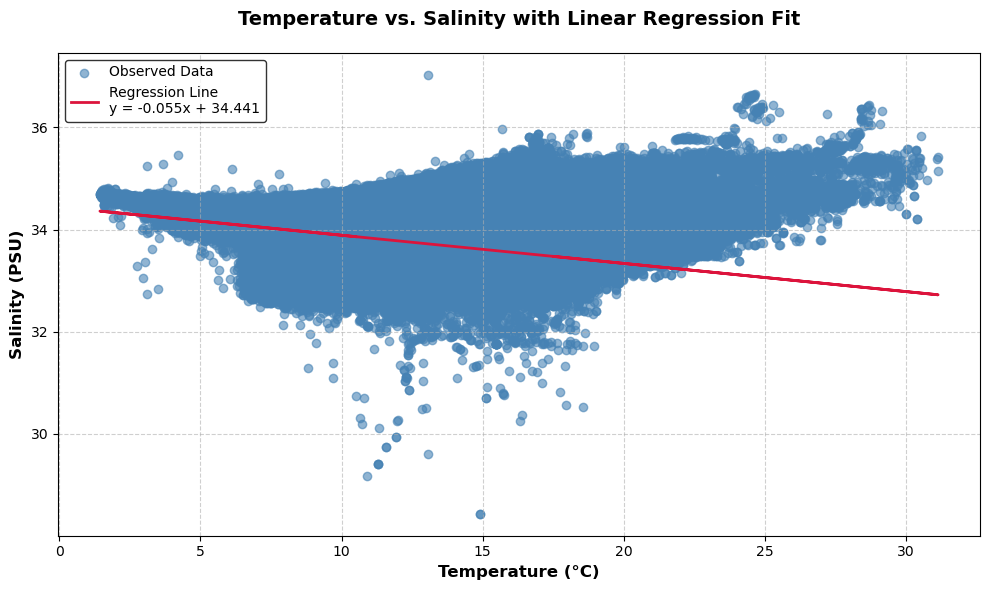

In [22]:
# Put your code here
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(x, y, alpha=0.6, label='Observed Data', color='steelblue')

# Regression line
plt.plot(x, y_pred, color='crimson', linewidth=2, 
         label=f'Regression Line\ny = {model.params[1]:.3f}x + {model.params[0]:.3f}')

# Add labels and title
plt.xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.ylabel('Salinity (PSU)', fontsize=12, fontweight='bold')
plt.title('Temperature vs. Salinity with Linear Regression Fit', 
          fontsize=14, fontweight='bold', pad=20)

# Add legend and grid
plt.legend(frameon=True, facecolor='white', edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

&#9989;  **Question 3.4 (2 points)**: What is the slope and intercept of your fit line?

In [26]:
# Put code here.
slope = model.params.iloc[1]    
intercept = model.params.iloc[0]  

print(f"Regression Equation: Salnty = {slope:.4f}*T_degC + {intercept:.4f}")


Regression Equation: Salnty = -0.0552*T_degC + 34.4409


**&#9989; Do this:** **Question 3.5 (4 points)**: Use `plot_regress_exog` to investigate the distribution of residuals in your model fit. Make sure to create a large enough figure so that everything is easily visible. 

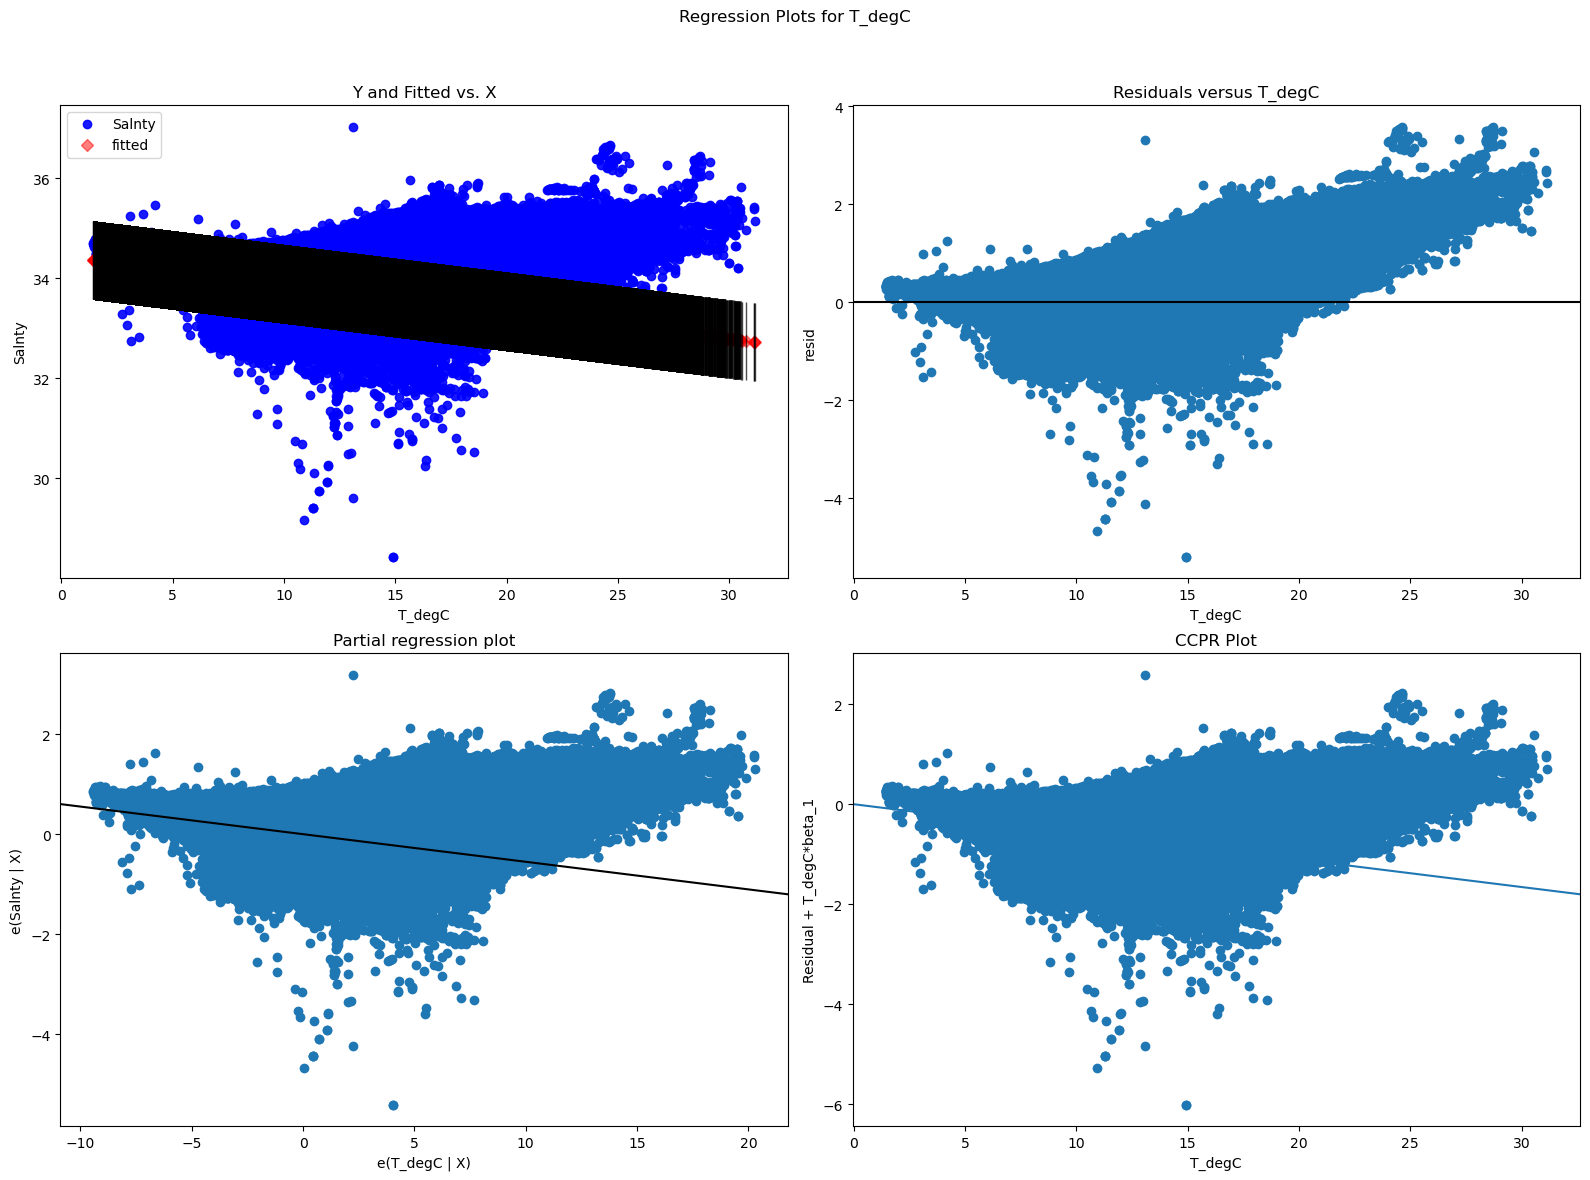

In [31]:
# Put code here.
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog

model = sm.OLS(y, X).fit()
fig = plt.figure(figsize=(16, 12))
plot_regress_exog(model, 'T_degC', fig=fig)

plt.show()

&#9989;  **Question 3.6 (6 points)**: Now use some online resource to help you make sense of this residual plot. Is there heteroscedastisity? Is there constant variance? Does it show signs of non-linearity? These are a few questions you might ask yourself or try to figure out in making sense of the residual plot. 

<font size=+3>&#9998;</font> The scatter of points shows a pattern where the prediction errors aren't spread out evenly and seem to lean in one direction. This means our straight-line model isn't capturing the relationship correctly. When we check if our model is good, we want the errors to be random with no clear pattern, but that's not what we're seeing here.

Answer: It looks biased and heteroscedastic. aka it is not what we want to see in a residual plot for a model.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

# Part 4: Multiple Regression (24 points)

In this part, we'll use multiple features to do predictions. https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

First, download and read in this synthetic dataset of Student Performance. `https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Student_Performance.csv`

&#9989;  **Question 4.1 (5 points)**: Display the data types of the data you have just read in. We want all of our data types to be integers or floats. Modify the `Extracurricular Activities` column so that a YES is now a 1 and a NO is now a 0. 

In [53]:
# Put your code here
!curl -o Student_Performance.csv https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Student_Performance.csv
Stu_Perf_df = pd.read_csv("Student_Performance.csv")

Stu_Perf_df["Extracurricular Activities"] = (
    Stu_Perf_df["Extracurricular Activities"]
    .str.upper()  # Ensure "Yes" → "YES", "No" → "NO"
    .replace({"YES": 1, "NO": 0})
    .astype(int)   # Now safely convert to integer
)

print("Data Types After Conversion:")
print(Stu_Perf_df.dtypes)
Stu_Perf_df["Extracurricular Activities"]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  170k  100  170k    0     0  1906k      0 --:--:-- --:--:-- --:--:-- 1920k
Data Types After Conversion:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


/tmp/ipykernel_1209381/3263269656.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"YES": 1, "NO": 0})


0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int64

&#9989;  **Question 4.2 (5 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the `Performance Index` based on `Hours Studied`, `Previous Scores`,`Extracurricular Activities`, `Sample Question Papers Practiced` and `Sleep Hours`. Also, use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Fit these models and display the summary of results.  For now only use three columns of data as independent variables.You can. choose which columns to use in your model. We will add all of the other columns later.

In [54]:
# Put your code here
X = Stu_Perf_df[["Hours Studied", "Previous Scores", "Extracurricular Activities"]] 
y = Stu_Perf_df["Performance Index"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.365e+05
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:04:47   Log-Likelihood:                -22362.
No. Observations:               10000   AIC:                         4.473e+04
Df Residuals:                    9996   BIC:                         4.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

&#9989;  **Question 4.3 (4 points)**: Answer the following questions: 

1. What is your R-squared value? 

2. Is your multiple regression model a good fit? why or why not?

<font size=+3>&#9998;</font> The R-squared value is .986. This model fits the data well, I would consider this good.

&#9989;  **Question 4.4 (2 points)**: Perform the multivariable linear regression again, but this time with all the features/columns. Display the summary of these results.

In [56]:
# Put your code here
Z = Stu_Perf_df[[
    "Hours Studied", 
    "Previous Scores", 
    "Extracurricular Activities", 
    "Sleep Hours", 
    "Sample Question Papers Practiced"
]]
y = Stu_Perf_df["Performance Index"]
Z = sm.add_constant(Z)
full_model = sm.OLS(y, Z).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:11:28   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

&#9989;  **Question 4.5 (2 points)**: How much better/worse is the full model compared to the original model you made? What are its advantages? Briefly discuss the answer.

<font size=+3>&#9998;</font> Put your answers here: Ironically enough, with all features included in this model, the R value improves. This may be because of leakage in the data, considering there is overlap between some variables

&#9989;  **Question 4.6 (3 points)**: Create five `.graphics.plot_regress_exog` figures, one for each of the features (columns of original dataframe) in your model. Pay attention to the top two plots: the fitted values figure and the residual plot. 


Diagnostic Plots for: Hours Studied


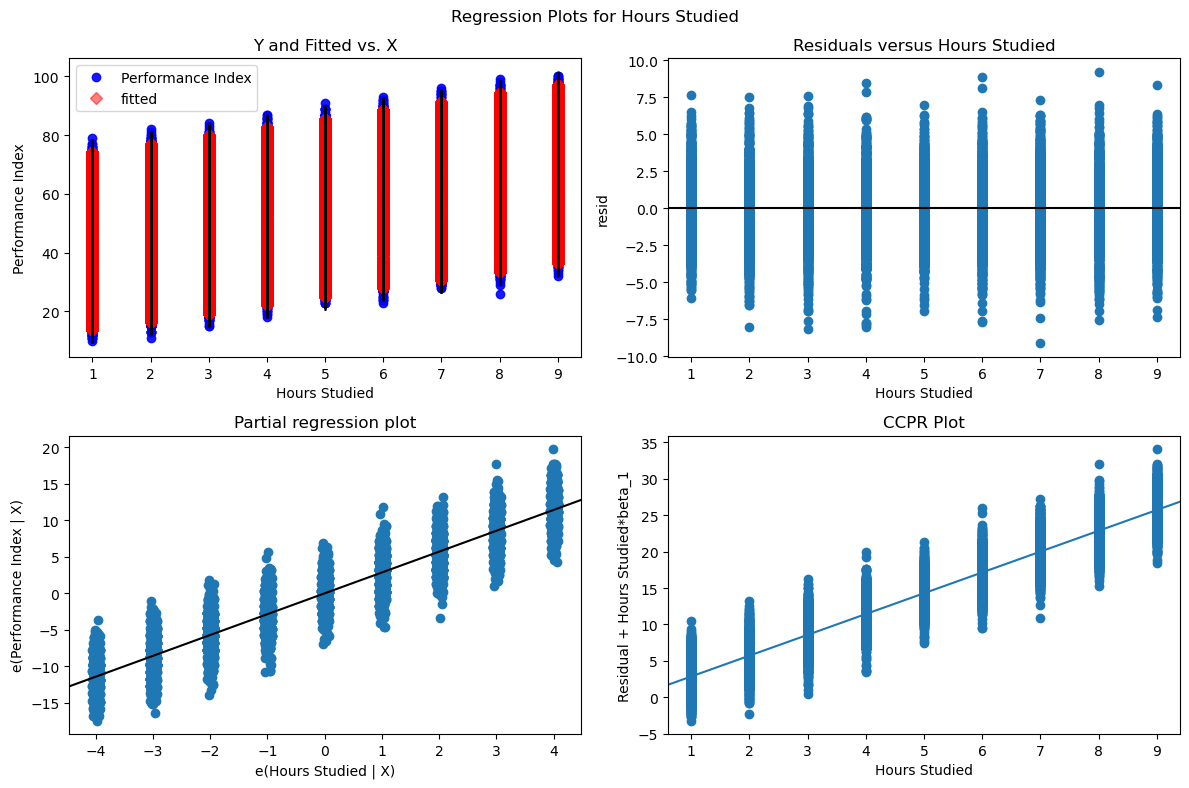


Diagnostic Plots for: Previous Scores


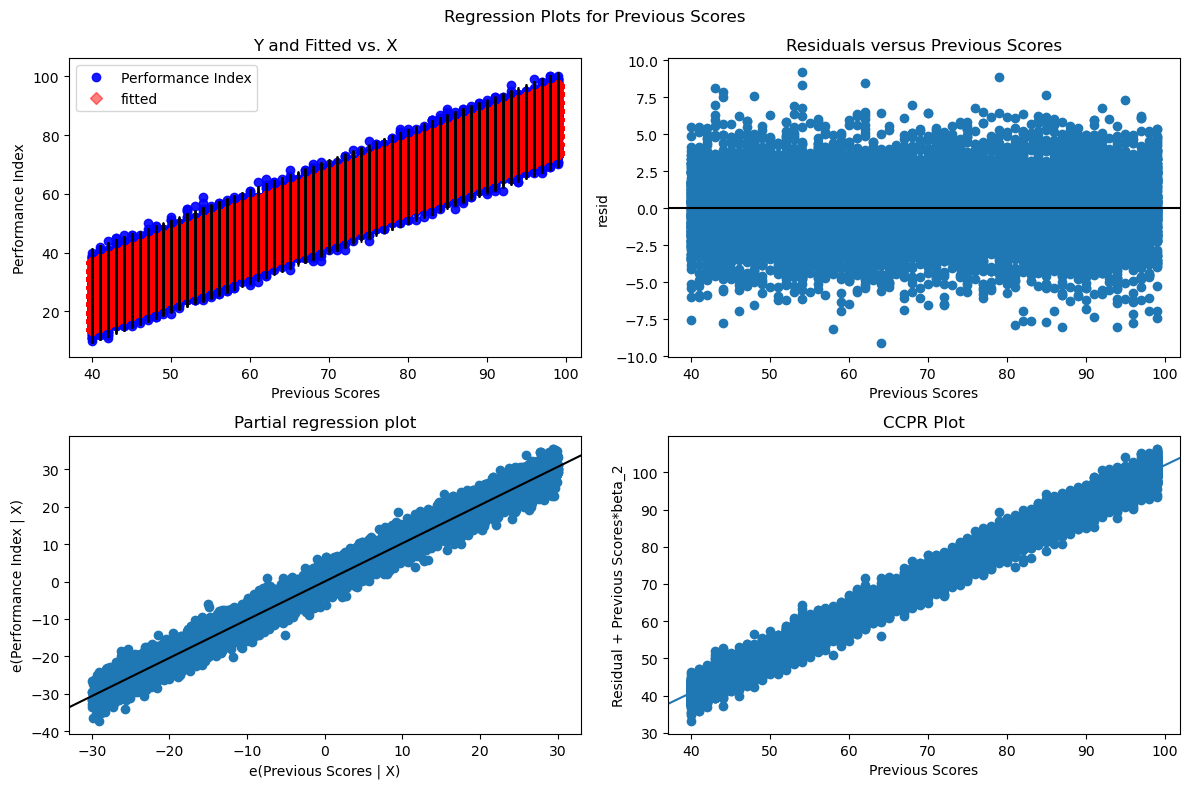


Diagnostic Plots for: Extracurricular Activities


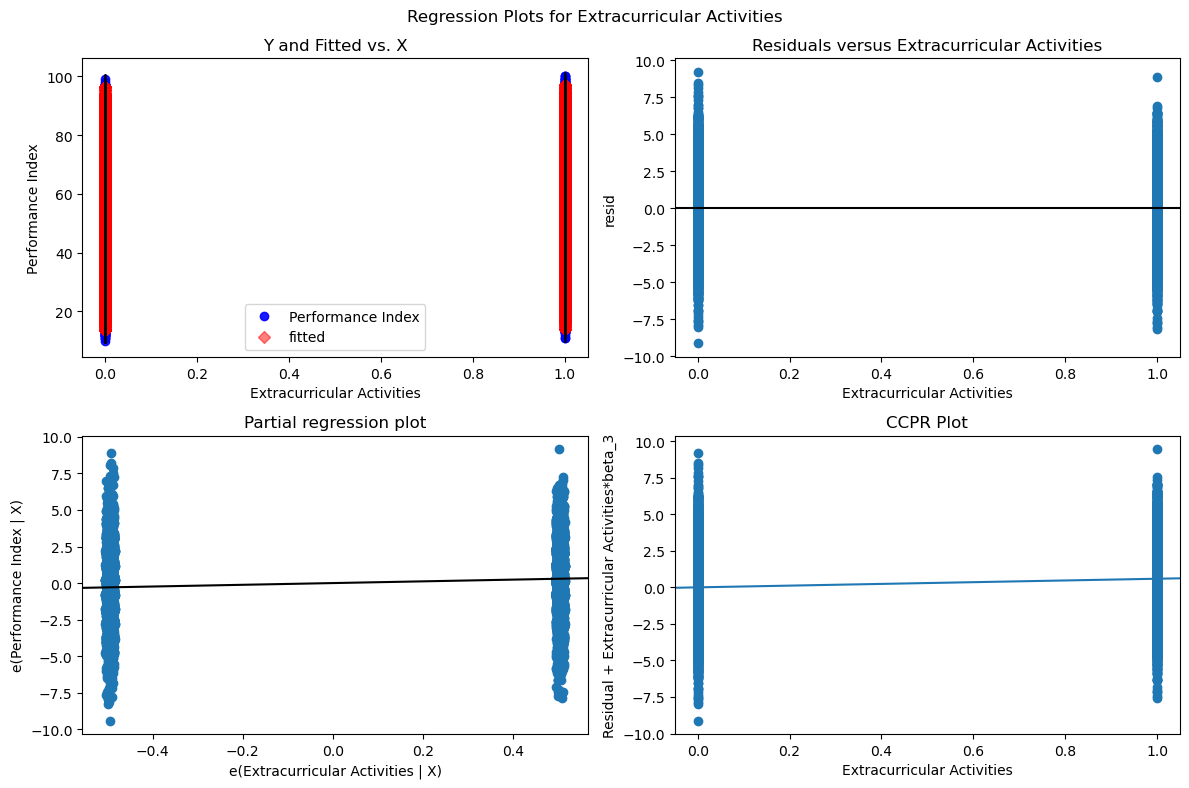

In [57]:
# Put your code here.
features = X.columns[1:]  # Skip 'const'
plt.rcParams['figure.figsize'] = (12, 8)  # Larger plot size

for feature in features:
    print(f"\nDiagnostic Plots for: {feature}")
    fig = plot_regress_exog(model, feature)
    plt.tight_layout()
    plt.show()

&#9989;  **Question 4.7 (3 points)**: If we could only use one feature to predict Student Performance, which feature would do the best job? 

I would argue that previous scores are the biggest contributor to grade success. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

# Part 5: Logistic Regression (17 points)

In this part, we'd like to use logistic regression to classify whether a candy has chocolate or not. Logistic regression (as we've learned so far in class) does binary classification. 



&#9989;  **Question 5.1 (2 points)**: We will work with data that is available at https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/data 

**You'll need to download the following file**:

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/candy-data.csv`

**Do This**: In the cell below, type the code for downloading the data from inside your notebook and also code for loading the data into a pandas dataframe.

In [61]:
# Put your code here
!curl -o candy_data.csv https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/candy-data.csv
candy_df = pd.read_csv("candy_data.csv")
candy_df

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5205  100  5205    0     0  76756      0 --:--:-- --:--:-- --:--:-- 77686


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


&#9989;  **Question 5.2 (3 points)**:

Create a `Pandas` `Series` called `labels` which has data from the `Chocolate` column of the DataFrame. Also, create a `Pandas` `DataFrame` called `features` which consists of all the columns besides `competitorname` and `chocolate`. Display the labels and features to make sure you did this correctly.

In [63]:
# Put your code here.
labels = candy_df['chocolate']
features = candy_df.drop(columns=['competitorname', 'chocolate'])
print("=== Labels (Chocolate column) ===")
print(labels.head())
print("\n=== Features (all columns except competitorname and Chocolate) ===")
print(features.head())

=== Labels (Chocolate column) ===
0    1
1    1
2    0
3    0
4    0
Name: chocolate, dtype: int64

=== Features (all columns except competitorname and Chocolate) ===
   fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  bar  \
0       0        1               0       0                 1     0    1   
1       0        0               0       1                 0     0    1   
2       0        0               0       0                 0     0    0   
3       0        0               0       0                 0     0    0   
4       1        0               0       0                 0     0    0   

   pluribus  sugarpercent  pricepercent  winpercent  
0         0         0.732         0.860   66.971725  
1         0         0.604         0.511   67.602936  
2         0         0.011         0.116   32.261086  
3         0         0.011         0.511   46.116505  
4         0         0.906         0.511   52.341465  


&#9989;  **Question 5.3 (4 points)**: Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [64]:
# Put your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, 
    labels, 
    test_size=0.2, 
    random_state=0  
)


print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (68, 11)
Testing Features Shape: (17, 11)
Training Labels Shape: (68,)
Testing Labels Shape: (17,)


&#9989;  **Question 5.3 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [67]:
# Put your code here
X_train_const = sm.add_constant(X_train)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train_const).fit()

# Display model summary
print(logit_model.summary())

         Current function value: 0.160059
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              chocolate   No. Observations:                   68
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                           11
Date:                Sat, 05 Apr 2025   Pseudo R-squ.:                  0.7689
Time:                        00:25:13   Log-Likelihood:                -10.884
converged:                      False   LL-Null:                       -47.105
Covariance Type:            nonrobust   LLR p-value:                 4.186e-11
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.7656      5.411     -1.989      0.047     -21.372      -0.159
fruity              -6.8280      2.455     -2.7

/opt/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


&#9989;  **Question 5.4 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [70]:
# Put your code here
X_test_const = sm.add_constant(X_test)
test_probs = logit_model.predict(X_test_const)
y_pred = (test_probs >= 0.5).astype(int)

test_accuracy = (y_pred == y_test).mean()
print(f"Test Accuracy: {test_accuracy:.3f} ({sum(y_pred == y_test)}/{len(y_test)} correct)")

Test Accuracy: 0.941 (16/17 correct)


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 6. Setting a project timeline. (5 points)

You will know which project you will be working on as a group on Monday/Tuesday March 24th/25th. You and your group will be presenting this project during the last week of class (April 21st - 25th).  Come up with a project timeline with specific goals/checkpoints to meet as this deadline approaches.  The ability to set project timelines is a very useful skill to have professionally. You can create this timeline yourself, as a group, or you may ask generative ai to try and make a timeline for you. Try to in the very least create weekly checkpoints (~3).

*Week 1: Research and Planning*
- Form project teams and assign roles
- Identify required financial data sources
- Begin designing optimization framework
  
*Week 2: Data Collection and Analysis Setup*
- Define objective functions (Sharpe ratio, returns, etc.)
- Create constraints for optimization
- Run initial backtest on historical data
  
*Week 3: Portfolio Optimization Implementation*
- Complete comprehensive backtesting
- Compare performance of different technical indicator combinations
- Finalize result analysis and conclusions
  
*Week 4: Finalization and Presentation*
- Finalize project report
- Submit final report and code repository
- Deliver group presentation

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [32]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University